In [1]:
#Pylab inline is not a good habit to use
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

In [2]:
class NNb:
    def __init__(self, X, c):
        self.n, self.N = X.shape
        self.X = X
        self.c = c

    def classify(self, x, k):
        d = self.X - tile(x.reshape(self.n,1), self.N);
        dsq = sum(d*d,0)
        
        indices = dsq.argsort()[:k]
        result = np.argmax(np.bincount(self.c[indices].astype(int)))
        
        return self.c[1]

In [3]:
#Convert the class names to ints
def convert_classes(class_name):
    class_name=class_name.decode()
    mapping = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
    return mapping[class_name]


#Normal distribution function
def ndf(sigma, mu, x):
    return (1 / (sqrt(2 * power(sigma, 2) * pi))) * exp(-1 * power(x - mu, 2) / (2 * power(sigma, 2)))


#Read in data and convert the class names to floats
data = loadtxt('iris.data', delimiter=',', dtype=float, converters={4: convert_classes})

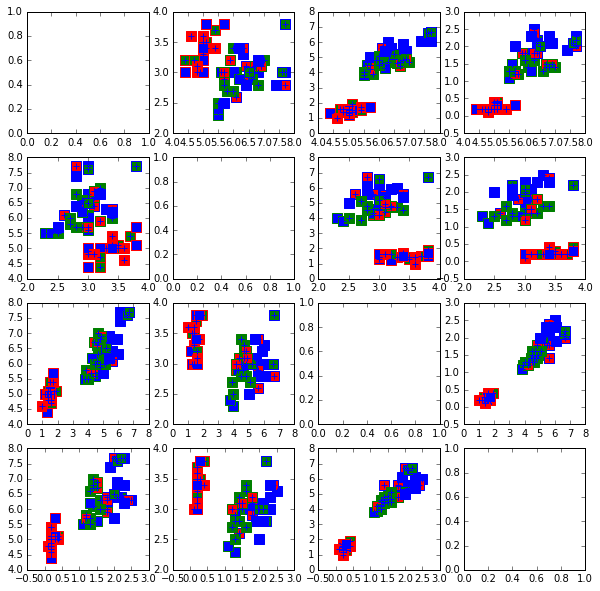

In [4]:
ind = arange(150) # indices into the dataset
ind = permutation(ind) # random permutation
L = ind[0:90] # learning set indices

T = ind[90:] # test set indices

# Learning Set
X = transpose(data[L,0:4])
nnc = NNb(X, data[L,-1])

# Classification of Test Set
c = zeros(len(T))
for i in arange(len(T)):
    c[i] = nnc.classify(data[T[i],0:4], 5)

# Confusion Matrix
CM = zeros((3,3))
for i in range(3):
    for j in range(3):
        CM[i,j] = sum( logical_and(data[T,4]==(i+1),c==(j+1)) )

# print(CM)

plt.figure(figsize=(10,10))
# Plot Test Set
figure(1)
color = array( ["red", "green", "blue"])
for i in range(4):
    for j in range(4):
        subplot(4,4,4*i+j+1)
        if i==j:
            continue
        plt.scatter(data[T,i], data[T,j], s=100, marker="s",
                    edgecolor=color[data[T,4].astype(int)-1],
                    facecolor=["red","green","blue"]*len(T))
        plt.scatter(data[T,i], data[T,j], s=30, marker="+",
                    edgecolor=color[c.astype(int)-1])
    
plt.show()